In [91]:
# 此处定义一个处理GDP和生活满意度的函数

In [92]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # pivot数据透视表，index行，columns列。
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # print(oecd_bli)
    # inplace不创建新的对象，直接对原始对象进行修改
    # print(gdp_per_capita)
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # 将列转化为行索引
    gdp_per_capita.set_index("Country", inplace=True)
    # left_index表示连接键
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    print(full_country_stats)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    # iloc通过行号取数据
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [93]:
import matplotlib

In [94]:
import matplotlib.pyplot as plt

In [95]:
import numpy as np

In [96]:
import pandas as pd

In [97]:
import sklearn

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
# Load the data

In [101]:
oecd_li = pd.read_csv("./datasets/oecd_bli_2015.csv",thousands=',')

In [102]:
# oecd_li = oecd_li[oecd_li["INEQUALITY"]=="TOT"]

In [103]:
# print(oecd_li)

In [105]:
gdp_per_capita = pd.read_csv("./datasets/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1',na_values = "n/a")

In [88]:
# prepare the data

In [89]:
country_stats = prepare_country_stats(oecd_li,gdp_per_capita)

                 Air pollution  Assault rate  Consultation on rule-making  \
Country                                                                     
Australia                 13.0           2.1                         10.5   
Austria                   27.0           3.4                          7.1   
Belgium                   21.0           6.6                          4.5   
Brazil                    18.0           7.9                          4.0   
Canada                    15.0           1.3                         10.5   
Chile                     46.0           6.9                          2.0   
Czech Republic            16.0           2.8                          6.8   
Denmark                   15.0           3.9                          7.0   
Estonia                    9.0           5.5                          3.3   
Finland                   15.0           2.4                          9.0   
France                    12.0           5.0                          3.5   

In [90]:
print(country_stats)

                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
Estonia               17288.083                5.6
Greece                18064.288                4.8
Portugal              19121.592                5.1
Slovenia              20732.482                5.7
Spain                 25864.721                6.5
Korea                 27195.197                5.8
Italy                 29866.581                6.0
Japan                 32485.545                5.9
Israel                35343.336                7.4
New Zealand           37044.891                7.3
France                37675.006                6.5
Belgium               40106.632                6.9
Germany               40996.511

In [32]:
X = np.c_[country_stats["GDP per capita"]]

In [33]:
Y = np.c_[country_stats["Life satisfaction"]]

In [35]:
# 可视化数据

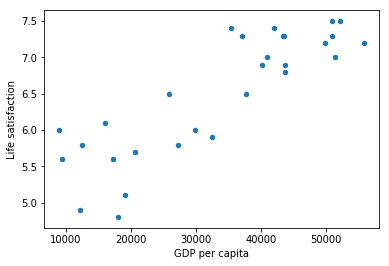

In [36]:
country_stats.plot(kind='scatter',x="GDP per capita",y="Life satisfaction")

In [37]:
plt.show()

In [38]:
# 选择一个线性回归模型

In [44]:
lin_reg_model=LinearRegression()

In [45]:
# 训练模型

In [46]:
lin_reg_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# 进行预测对一个国家

In [48]:
X_new = [[22587]] # 该国家的GDP

In [49]:
print(lin_reg_model.predict(X_new)) 

[[ 5.96242338]]


# 模型

# 行号